In [1]:
# relevant imports
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from matplotlib import rcParams
import rsatoolbox
import rsatoolbox.data as rsd # abbreviation to deal with dataset
import rsatoolbox.rdm as rsr
import os
import seaborn as sns
import sklearn as sk
import math
import pandas as pd
import pickle
import copy

In [2]:
# change the working directory to be the timecourse data
#os.chdir('/mnt/Data1/linjdata1/vswmda/scan_data/rsa/full_GLM_mgs_0.05_50/')
os.chdir('/gpfs/scratch/linjjiang/scan_data/rsa/full_GLM_mgs_0.05_50/')

In [31]:
subjects = ['f09','f10','f11','f12','f15','f16','f17','f18','f19']
epochs = ['delay','response','stimulus']
exp1_subjects = ['f09','f10','f11','f12','f15','f16']
exp2_subjects = ['f17','f18','f19']

In [4]:
# get ROI name
# if full_GLM_mgs_xxx
order = ['area4', 'v1', 'v2', 'ips', 'fef', 'sfg', 'mfg', 'ifg',
         'ips0', 'ips1', 'ips2', 'ips3', 'ips4', 'ips5', 'spl1']

# # if full_GLM_atlas_roi
# order = ['area4-ju50',
#          'area8-hcp','area9-hcp','area9|46-hcp','area44|45|47l-hcp','fef-hcp',
         
#          'v1-wang25','v2-wang25','ips-wang15','ips0-wang15','ips1-wang15',
#          'ips2-wang15','ips3-wang15','ips4-wang15','ips5-wang15','spl1-wang15','fef-wang25',
         
#          'ipcs-md','spcs-md','amfg-md','pmfg-md','ifg-md'
#          ]

In [5]:
# change the following as needed
roi_labels = {'area4': 'M1', 'v1': 'V1', 'v2': 'V2', 
              
              'ips0': 'IPS0', 'ips1': 'IPS1', 'ips2': 'IPS2', 
              'ips3': 'IPS3', 'ips4': 'IPS4', 'ips5': 'IPS5', 'spl1': 'SPL1',
              
          'ips': 'IPS', 'fef': 'FEF', 'sfg': 'SFG', 
          'mfg': 'MFG', 'ifg': 'IFG'}
# roi_order = list(roi_labels.values())
subj_labels = {index: subject for index, subject in enumerate(subjects, start=0)}
epoch_labels = {0: 'stimulus', 1: 'delay', 2: 'response'}

In [6]:
# Construct model
data = io.matlab.loadmat('./model.mat')
matlab_data = data['model']
good_cond = data['good_cond']

In [7]:
conditions = [good_cond[0,i][0] for i in range(good_cond[0].shape[0])]
print(conditions)

['3WL', '3TL', '3WR', '3TR', '5.5WL', '5.5TL', '5.5WR', '5.5TR']


In [8]:
n_models = 4#len(matlab_data[0][0][0][0])
print(n_models)
# print the first model
print(matlab_data[0][0][0][0][0]) # 0, 0, name (1), 0, which model
print(matlab_data[0][0][1][0][0]) # 0, 0, actual model matrix (2), 0, which model

# print the 2nd model
print(matlab_data[0][0][0][0][1]) # 0, 0, name (1), 0, which model
print(matlab_data[0][0][1][0][1]) # 0, 0, actual model for hemifield (2), 0, which model

# print the 3rd model
print(matlab_data[0][0][0][0][2]) # 0, 0, name (1), 0, which model
print(matlab_data[0][0][1][0][2]) # 0, 0, actual model for hemifield (2), 0, which model

# print the 4th model
print(matlab_data[0][0][0][0][3]) # 0, 0, name (1), 0, which model
print(matlab_data[0][0][1][0][3]) # 0, 0, actual model for hemifield (2), 0, which model

4
['UniqPat']
[[0 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1]
 [1 1 1 0 1 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 0]]
['TempPat']
[[0 0 1 1 0 0 1 1]
 [0 0 1 1 0 0 1 1]
 [1 1 0 0 1 1 0 0]
 [1 1 0 0 1 1 0 0]
 [0 0 1 1 0 0 1 1]
 [0 0 1 1 0 0 1 1]
 [1 1 0 0 1 1 0 0]
 [1 1 0 0 1 1 0 0]]
['ShapePat']
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
['EccPat']
[[0 0 0 0 1 1 1 1]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]]


In [9]:
model_names = [matlab_data[0][0][0][0][i][0] for i in range(1,n_models)]
rdms_array = np.array([matlab_data[0][0][1][0][i] for i in range(1,n_models)])

print(type(rdms_array[1]))
print(rdms_array[1])
print(rdms_array.shape)
print(rdms_array[0].shape)
print(model_names)
# construct model rdms
model_rdms = rsatoolbox.rdm.RDMs(rdms_array,
                            rdm_descriptors={'model':model_names},
                            pattern_descriptors={'conds':conditions},
                            dissimilarity_measure='Crossnobis')
#print(model_rdms[1])
#print(model_rdms.to_df())
#print(model_rdms)

<class 'numpy.ndarray'>
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
(3, 8, 8)
(8, 8)
['TempPat', 'ShapePat', 'EccPat']


In [10]:
models_weight = rsatoolbox.model.ModelWeighted(model_names, model_rdms)
print(models_weight)

In [11]:
# Check orthogonality of the models:
from scipy.stats import pearsonr

# Flatten the rdm matrices
A_flat = rdms_array[0].flatten() # temporal pattern
B_flat = rdms_array[1].flatten() # spatial (shape) pattern
C_flat = rdms_array[2].flatten() # spatial (eccentricity) pattern
#D_flat = rdms_array[0].flatten() # unique pattern

# List of flattened matrices
matrices = [A_flat, B_flat, C_flat] #, D_flat

# Calculate pairwise Pearson correlations
correlations = [] # A & B, A & C, A & D, B & C, B & D, C & D
for i in range(len(matrices)):
    for j in range(i+1, len(matrices)):
        corr, _ = pearsonr(matrices[i], matrices[j])
        correlations.append(corr)

# Calculate the median of the Pearson correlations
median_correlation = np.median(correlations)

print("Median Pearson correlation:", median_correlation)
print(correlations)
# The temporal model, spatial shape model and eccentricity model are completely orthogonal!!

Median Pearson correlation: 0.0
[0.0, 0.0, 0.0]


In [34]:
with open('rdm_crossnobis_split_by_sess_all.pkg','rb') as f:
    RDM = pickle.load(f)

In [45]:
#store the subject id and roi name in dictionary, then use the dictionary to retrieve rdms to plot
subj_dict = dict()
roi_dict = dict()
epoch_dict = dict()
sess_dict = dict()

for idx, rdm in enumerate(RDM):
    subj = rdm.rdm_descriptors['subj']
    if isinstance(subj,list):
        subj = subj[0]
        
    roi = rdm.rdm_descriptors['roi'][0]
    if isinstance(roi,list):
        roi = roi[0]
        
    epoch = rdm.rdm_descriptors['epoch']
    if isinstance(epoch,list):
        epoch = epoch[0]
        
    sess = rdm.rdm_descriptors['session']
    if isinstance(sess,list):
        sess = sess[0]
    
    if subj not in subj_dict:
        subj_dict[subj] = []
    subj_dict[subj].append(idx)
    
    if roi not in roi_dict:
        roi_dict[roi] = []
    roi_dict[roi].append(idx)

    if epoch not in epoch_dict:
        epoch_dict[epoch] = []
    epoch_dict[epoch].append(idx)

    if sess not in sess_dict:
        sess_dict[sess] = []
    sess_dict[sess].append(idx)

In [54]:
print(sess_dict.keys())
print(subj_dict.keys())
print(roi_dict.keys())
print(roi_dict['area4'])

dict_keys([0, 1])
dict_keys(['f09', 'f10', 'f11', 'f12', 'f15', 'f16', 'f17', 'f18', 'f19'])
dict_keys(['area4', 'v1', 'v2', 'ips', 'fef', 'sfg', 'mfg', 'ifg', 'ips0', 'ips1', 'ips2', 'ips3', 'ips4', 'ips5', 'spl1'])
[0, 15, 16, 45, 46, 75, 76, 105, 106, 135, 136, 165, 166, 195, 196, 225, 226, 255, 270, 271, 300, 301, 330, 331, 360, 361, 390, 391, 420, 421, 450, 451, 480, 481, 510, 525, 526, 555, 556, 585, 586, 615, 616, 645, 646, 675, 676, 705, 706, 735, 736]


In [46]:
print(len(RDM))
print(RDM[0])

765
rsatoolbox.rdm.RDMs
1 RDM(s) over 8 conditions

dissimilarity_measure = 
crossnobis

dissimilarities[0] = 
[[ 0.         -0.73246353 -0.10891931 -0.03151799 -0.13666205  0.3097244
  -0.58775727  0.52855591]
 [-0.73246353  0.          0.76202754 -0.47567247  0.21300852 -1.14845819
  -0.98923548  0.98959533]
 [-0.10891931  0.76202754  0.          0.01714445 -0.06025025  1.46239158
  -0.53374515  2.06432883]
 [-0.03151799 -0.47567247  0.01714445  0.         -0.36605119  1.54408426
   0.04720617  0.79075425]
 [-0.13666205  0.21300852 -0.06025025 -0.36605119  0.         -0.77363911
  -1.04527787  0.99035248]
 [ 0.3097244  -1.14845819  1.46239158  1.54408426 -0.77363911  0.
   0.46438043 -1.44595562]
 [-0.58775727 -0.98923548 -0.53374515  0.04720617 -1.04527787  0.46438043
   0.         -0.01621179]
 [ 0.52855591  0.98959533  2.06432883  0.79075425  0.99035248 -1.44595562
  -0.01621179  0.        ]]

descriptors: 
noise = [[0.85972391 0.         0.         ... 0.         0.         0.   

In [14]:
models_fixed = []
for i in range(len(model_names)):
    models_fixed.append(rsatoolbox.model.ModelFixed(model_names[i], model_rdms[i]))
print(models_fixed)

[<rsatoolbox.model.model.ModelFixed object at 0x2aab66bb8850>, <rsatoolbox.model.model.ModelFixed object at 0x2aab65db3110>, <rsatoolbox.model.model.ModelFixed object at 0x2aab672322d0>]


In [17]:
print(rdm.rdm_descriptors['session'],rdm.rdm_descriptors['epoch'])

[0] ['delay']


In [61]:
for rdm in rdms:
    print(rdm.rdm_descriptors)
    #print(isinstance(rdm.rdm_descriptors['session'], list))
    #print(rdm.pattern_descriptors)

{'roi': ['area4'], 'index': [0], 'session': [0], 'session_name': 'S5752', 'epoch': ['delay']}
{'roi': ['area4'], 'index': [0], 'session': [0], 'session_name': 'S5752', 'epoch': ['delay']}
{'roi': ['area4'], 'index': [0], 'session': [0], 'session_name': 'S5752', 'epoch': ['delay']}
{'roi': ['area4'], 'index': [0], 'session': [0], 'session_name': 'S5752', 'epoch': ['delay']}
{'roi': ['area4'], 'index': [0], 'session': [0], 'session_name': 'S5752', 'epoch': ['delay']}
{'roi': ['area4'], 'index': [0], 'session': [0], 'session_name': 'S5752', 'epoch': ['delay']}


In [62]:
rdm_test = rsatoolbox.rdm.rdms.concat(rdms)

AttributeError: rdm_descriptors have mismatched dimension with measurements.

In [28]:
temp = rdm.rdm_descriptors['session']
if isinstance(temp, list)==False:
    print('False')#rdm.rdm_descriptors['session'] = [rdm.rdm_descriptors['session']]

False


In [38]:
print(exp1_subjects)

['f09', 'f10', 'f11', 'f12', 'f15', 'f16']


In [63]:
df_unique = pd.DataFrame()
# specify the fitter
#fitter = rsatoolbox.model.fitter.Fitter(rsatoolbox.model.fitter.fit_optimize_positive) #fit_regress_nn, ridge_weight=1 #fit_optimize_positive

#for subj in exp1_subjects:
for epoch in epoch_dict.keys():
    for roi in roi_dict.keys():
        for sess in sess_dict.keys():
            rdms = []
            for subj in exp1_subjects:
                idx_set = set(epoch_dict[epoch]) & set(roi_dict[roi]) & set(sess_dict[sess]) & set(subj_dict[subj])
                idx = list(idx_set) #set(subj_dict[subj]) &
                #print(subj,epoch,roi,sess)
                #print(len(idx))
                print(idx)
                if len(idx) > 0:
                    rdm = RDM[idx0]
                    rdm.rdm_descriptors.pop('name',None)
                    rdm.rdm_descriptors.pop('subj',None)

                    temp = rdm.rdm_descriptors['session']
                    if isinstance(temp, list)==False:
                        rdm.rdm_descriptors['session'] = [rdm.rdm_descriptors['session']]

                    temp = rdm.rdm_descriptors['epoch']
                    if isinstance(temp, list)==False:
                        rdm.rdm_descriptors['epoch'] = [rdm.rdm_descriptors['epoch']]
                        
                    temp = rdm.rdm_descriptors['session_name']
                    if isinstance(temp, list)==False:
                        rdm.rdm_descriptors['session_name'] = [rdm.rdm_descriptors['session_name']]

                    rdms.append(rdm)
                        
            rdm_test = rsatoolbox.rdm.rdms.concat(rdms)

            results = rsatoolbox.inference.eval_bootstrap_rdm(models_fixed, 
                                            rdm_test, method='cosine',
                                            N=1000,boot_noise_ceil=True) #rsatoolbox.inference.eval_bootstrap_rdm(models, rdms_data, method='corr')
            df_unique = pd.concat([df_unique,pd.DataFrame({
                        'results': [results], 
                        'roi': [roi], 
                        'session': [sess],
                        'epoch': [epoch]
                    })], axis=0) #
                        
#                         theta= fitter(models_weight, rdms, method='cosine')
#                         #print(theta,model_names,roi,sess,subj)
#                         df_unique = pd.concat([df_unique,pd.DataFrame({
#                                     'model': model_names, 
#                                     'theta': theta.tolist(), 
#                                     'roi': [roi]*3, 
#                                     'session': [sess]*3,
#                                     'subj': [subj]*3,
#                                     'epoch': [epoch]*3
#                                 })], axis=0) #



[0]
[15]
[45]
[75]
[105]
[135]


100%|██████████| 1000/1000 [00:03<00:00, 321.48it/s]


[]
[16]
[46]
[76]
[106]
[136]


100%|██████████| 1000/1000 [00:02<00:00, 422.03it/s]


[1]
[17]
[47]
[77]
[107]
[137]


100%|██████████| 1000/1000 [00:02<00:00, 367.99it/s]


[]
[18]
[48]
[78]
[108]
[138]


100%|██████████| 1000/1000 [00:02<00:00, 426.00it/s]


[2]
[19]
[49]
[79]
[109]
[139]


100%|██████████| 1000/1000 [00:02<00:00, 375.54it/s]


[]
[20]
[50]
[80]
[110]
[140]


100%|██████████| 1000/1000 [00:02<00:00, 433.30it/s]


[3]
[21]
[51]
[81]
[111]
[141]


100%|██████████| 1000/1000 [00:02<00:00, 371.87it/s]


[]
[22]
[52]
[82]
[112]
[142]


100%|██████████| 1000/1000 [00:02<00:00, 431.05it/s]


[4]
[23]
[53]
[83]
[113]
[143]


100%|██████████| 1000/1000 [00:02<00:00, 370.10it/s]


[]
[24]
[54]
[84]
[114]
[144]


100%|██████████| 1000/1000 [00:02<00:00, 404.10it/s]


[5]
[25]
[55]
[85]
[115]
[145]


100%|██████████| 1000/1000 [00:02<00:00, 378.63it/s]


[]
[26]
[56]
[86]
[116]
[146]


100%|██████████| 1000/1000 [00:02<00:00, 426.79it/s]


[6]
[27]
[57]
[87]
[117]
[147]


100%|██████████| 1000/1000 [00:02<00:00, 373.74it/s]


[]
[28]
[58]
[88]
[118]
[148]


100%|██████████| 1000/1000 [00:02<00:00, 430.11it/s]


[7]
[29]
[59]
[89]
[119]
[149]


100%|██████████| 1000/1000 [00:02<00:00, 378.52it/s]


[]
[30]
[60]
[90]
[120]
[150]


100%|██████████| 1000/1000 [00:02<00:00, 408.39it/s]


[8]
[31]
[61]
[91]
[121]
[151]


100%|██████████| 1000/1000 [00:02<00:00, 402.27it/s]


[]
[32]
[62]
[92]
[122]
[152]


100%|██████████| 1000/1000 [00:02<00:00, 456.16it/s]


[9]
[33]
[63]
[93]
[123]
[153]


100%|██████████| 1000/1000 [00:02<00:00, 398.73it/s]


[]
[34]
[64]
[94]
[124]
[154]


100%|██████████| 1000/1000 [00:02<00:00, 461.79it/s]


[10]
[35]
[65]
[95]
[125]
[155]


100%|██████████| 1000/1000 [00:02<00:00, 395.08it/s]


[]
[36]
[66]
[96]
[126]
[156]


100%|██████████| 1000/1000 [00:02<00:00, 454.95it/s]


[11]
[37]
[67]
[97]
[127]
[157]


100%|██████████| 1000/1000 [00:02<00:00, 361.71it/s]


[]
[38]
[68]
[98]
[128]
[158]


100%|██████████| 1000/1000 [00:02<00:00, 442.19it/s]


[12]
[39]
[69]
[99]
[129]
[159]


100%|██████████| 1000/1000 [00:02<00:00, 383.47it/s]


[]
[40]
[70]
[100]
[130]
[160]


100%|██████████| 1000/1000 [00:02<00:00, 444.16it/s]


[13]
[41]
[71]
[101]
[131]
[161]


100%|██████████| 1000/1000 [00:02<00:00, 379.24it/s]


[]
[42]
[72]
[102]
[132]
[162]


100%|██████████| 1000/1000 [00:02<00:00, 435.31it/s]


[14]
[43]
[73]
[103]
[133]
[163]


100%|██████████| 1000/1000 [00:02<00:00, 387.92it/s]


[]
[44]
[74]
[104]
[134]
[164]


100%|██████████| 1000/1000 [00:02<00:00, 434.98it/s]


[255]
[270]
[300]
[330]
[360]
[390]


100%|██████████| 1000/1000 [00:02<00:00, 379.01it/s]


[]
[271]
[301]
[331]
[361]
[391]


100%|██████████| 1000/1000 [00:02<00:00, 441.90it/s]


[256]
[272]
[302]
[332]
[362]
[392]


100%|██████████| 1000/1000 [00:02<00:00, 365.56it/s]


[]
[273]
[303]
[333]
[363]
[393]


100%|██████████| 1000/1000 [00:02<00:00, 455.93it/s]


[257]
[274]
[304]
[334]
[364]
[394]


100%|██████████| 1000/1000 [00:02<00:00, 402.60it/s]


[]
[275]
[305]
[335]
[365]
[395]


 42%|████▏     | 417/1000 [00:00<00:01, 456.12it/s]


KeyboardInterrupt: 

In [72]:
print(df_unique.iloc[0,0])
print(df_unique.iloc[0,3])

Results for running bootstrap_rdm evaluation for cosine on 3 models:

Model    |   Eval ± SEM   | p (against 0) | p (against NC) |
------------------------------------------------------------
TempPat  |  0.091 ± 0.000 |      < 0.001  |       < 0.001  |
ShapePat |  0.220 ± 0.000 |      < 0.001  |       < 0.001  |
EccPat   |  0.229 ± 0.000 |      < 0.001  |       < 0.001  |

p-values are based on uncorrected t-tests
delay


In [74]:
result = df_unique.iloc[0,0]
result.p

AttributeError: 'Result' object has no attribute 'p'

In [48]:
print(df_unique)

Empty DataFrame
Columns: []
Index: []


(<Figure size 1250x1000 with 2 Axes>, <Axes: >, <Axes: >)

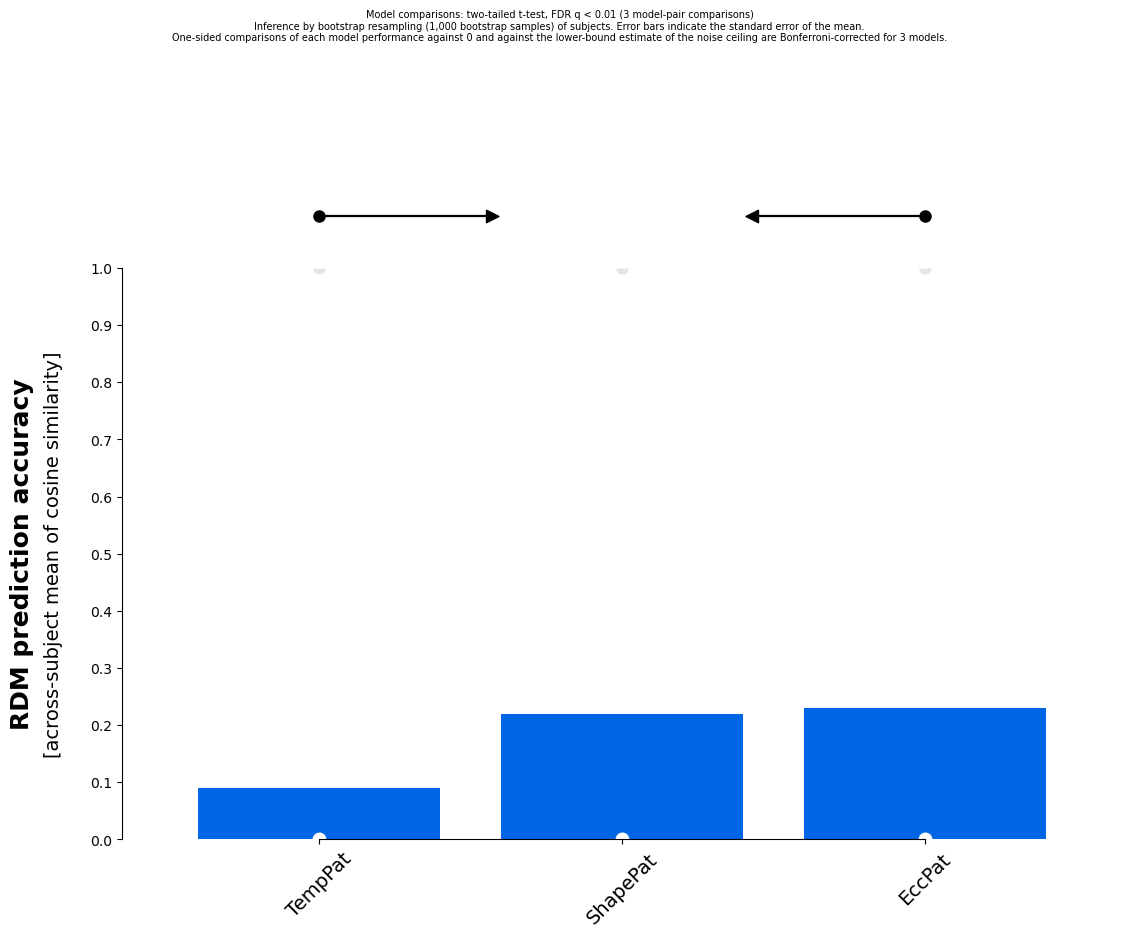

In [67]:
rsatoolbox.vis.plot_model_comparison(df_unique.iloc[0,0])

In [71]:
print(rdms)

[rsatoolbox.rdm.RDMs(
dissimilarity_measure = 
correlation
dissimilarities = 
[[0.1933397  1.01031541 0.35735646 1.05116897 0.29753357 0.84657388
  0.5886127  1.04925423 0.29716822 0.964166   0.29602589 0.80400707
  0.47715861 0.90432496 0.27014803 0.62890542 0.27719824 0.64992316
  0.87196365 0.51985344 0.9003249  0.42394231 0.69882223 0.27656006
  0.51088176 0.39693726 0.44284557 0.49648224]]
descriptors = 
{}
rdm_descriptors = 
{'roi': ['spl1'], 'index': [0], 'session': [1], 'epoch': ['stimulus']}
pattern_descriptors = 
{'index': [0, 1, 2, 3, 4, 5, 6, 7], 'sess_index': [1, 1, 1, 1, 1, 1, 1, 1], 'conds': ['CWL', 'CTL', 'CWR', 'CTR', 'NWL', 'NTL', 'NWR', 'NTR'], 'pattern_index': [0, 1, 2, 3, 4, 5, 6, 7]}
, rsatoolbox.rdm.RDMs(
dissimilarity_measure = 
correlation
dissimilarities = 
[[0.19553182 0.07941482 0.13664701 0.20959409 0.2245041  0.10569198
  0.1943806  0.2046541  0.13706179 0.12960455 0.14512931 0.25317703
  0.20028165 0.1323997  0.24556014 0.23580066 0.1099231  0.21528022
  

In [72]:
rdm_test = rsatoolbox.rdm.rdms.concat(rdms)
print(rdm_test)

rsatoolbox.rdm.RDMs
8 RDM(s) over 8 conditions

dissimilarity_measure = 
None

dissimilarities[0] = 
[[0.         0.1933397  1.01031541 0.35735646 1.05116897 0.29753357
  0.84657388 0.5886127 ]
 [0.1933397  0.         1.04925423 0.29716822 0.964166   0.29602589
  0.80400707 0.47715861]
 [1.01031541 1.04925423 0.         0.90432496 0.27014803 0.62890542
  0.27719824 0.64992316]
 [0.35735646 0.29716822 0.90432496 0.         0.87196365 0.51985344
  0.9003249  0.42394231]
 [1.05116897 0.964166   0.27014803 0.87196365 0.         0.69882223
  0.27656006 0.51088176]
 [0.29753357 0.29602589 0.62890542 0.51985344 0.69882223 0.
  0.39693726 0.44284557]
 [0.84657388 0.80400707 0.27719824 0.9003249  0.27656006 0.39693726
  0.         0.49648224]
 [0.5886127  0.47715861 0.64992316 0.42394231 0.51088176 0.44284557
  0.49648224 0.        ]]

descriptors: 

rdm_descriptors: 
roi = ['spl1', 'spl1', 'spl1', 'spl1', 'spl1', 'spl1', 'spl1', 'spl1']
index = [0, 1, 2, 3, 4, 5, 6, 7]
session = [1, [1], 1, 1,

In [75]:
results_1 = rsatoolbox.inference.eval_fixed(models_fixed, rdm_test, method='cosine')
#rsatoolbox.vis.plot_model_comparison(results_1)
print(results_1) # no variance across subjects

Results for running fixed evaluation for cosine on 3 models:

Model    |   Eval ± SEM   | p (against 0) | p (against NC) |
------------------------------------------------------------
TempPat  |  0.719 ± 0.010 |      < 0.001  |       < 0.001  |
ShapePat |  0.736 ± 0.016 |      < 0.001  |       < 0.001  |
EccPat   |  0.748 ± 0.014 |      < 0.001  |       < 0.001  |

p-values are based on uncorrected t-tests


100%|██████████| 1000/1000 [00:03<00:00, 307.80it/s]


(<Figure size 1250x1000 with 2 Axes>, <Axes: >, <Axes: >)

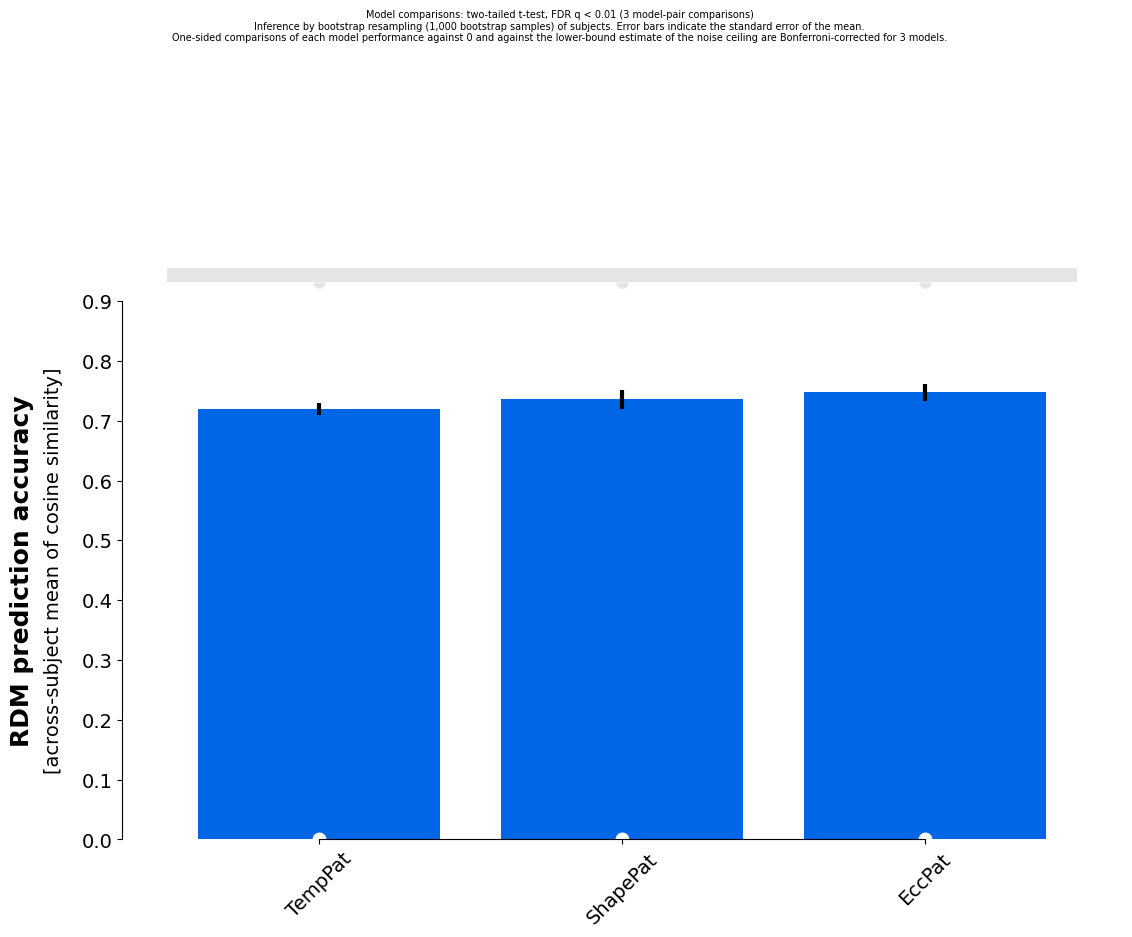

In [89]:
results_2a = rsatoolbox.inference.eval_bootstrap_rdm(models_fixed, rdm_test, method='cosine',
                                                        N=1000,boot_noise_ceil=True)
rsatoolbox.vis.plot_model_comparison(results_2a)

In [90]:
print(results_2a)

Results for running bootstrap_rdm evaluation for cosine on 3 models:

Model    |   Eval ± SEM   | p (against 0) | p (against NC) |
------------------------------------------------------------
TempPat  |  0.720 ± 0.010 |      < 0.001  |       < 0.001  |
ShapePat |  0.736 ± 0.016 |      < 0.001  |       < 0.001  |
EccPat   |  0.748 ± 0.015 |      < 0.001  |       < 0.001  |

p-values are based on uncorrected t-tests


100%|██████████| 1000/1000 [00:05<00:00, 196.55it/s]


(<Figure size 1250x1000 with 2 Axes>, <Axes: >, <Axes: >)

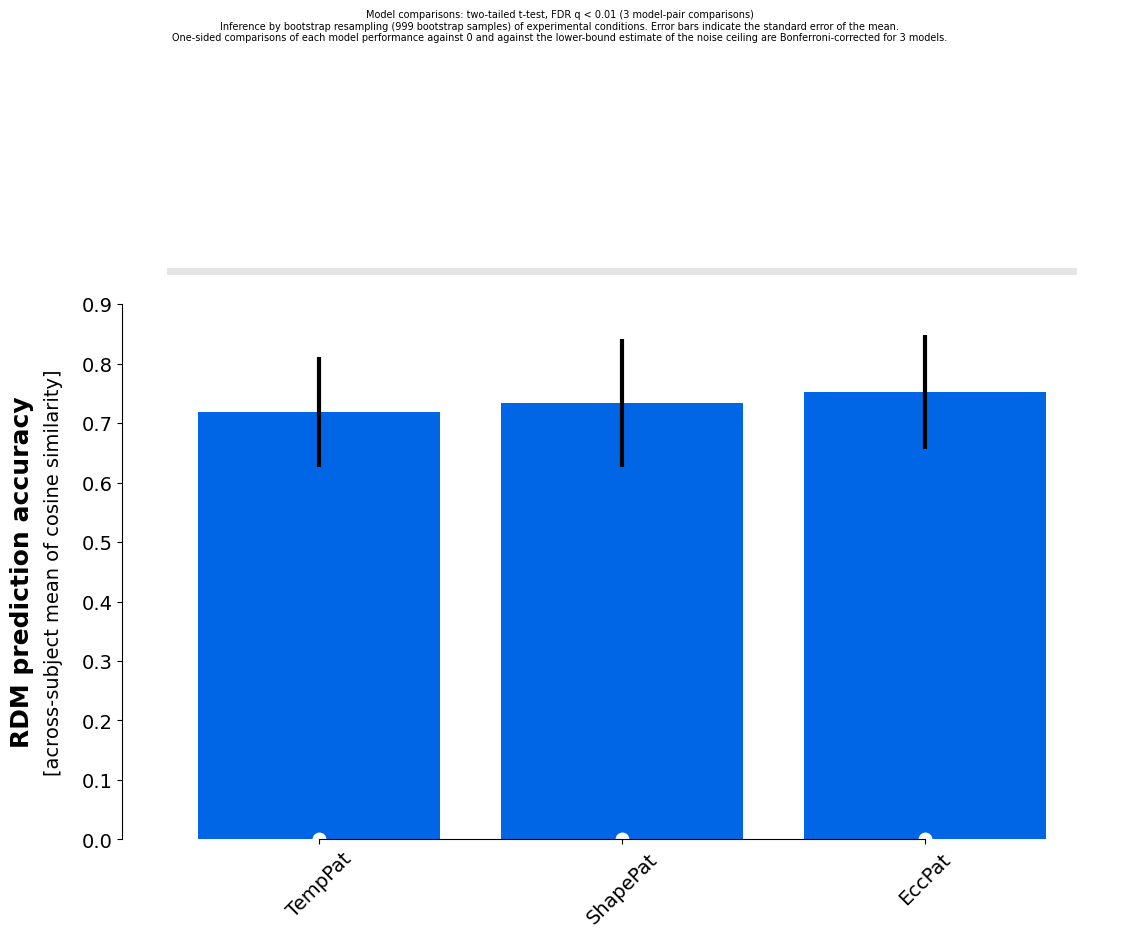

In [76]:
results_2b = rsatoolbox.inference.eval_bootstrap_pattern(models_fixed, rdm_test, method='cosine',
                                                        pattern_descriptor='index',N=1000,boot_noise_ceil=True)
rsatoolbox.vis.plot_model_comparison(results_2b)

In [77]:
print(results_2b)

Results for running bootstrap_pattern evaluation for cosine on 3 models:

Model    |   Eval ± SEM   | p (against 0) | p (against NC) |
------------------------------------------------------------
TempPat  |  0.718 ± 0.092 |      < 0.001  |         0.043  |
ShapePat |  0.733 ± 0.108 |      < 0.001  |         0.088  |
EccPat   |  0.753 ± 0.096 |      < 0.001  |         0.075  |

p-values are based on uncorrected t-tests


In [78]:
np.nanmax(results_2b.noise_ceiling)

0.9899196331277256

In [79]:
results_2b.diff_var
results_2b.model_var
results_2b.noise_ceil_var

array([[0.00877597, 0.00868663],
       [0.01179775, 0.01173445],
       [0.00883766, 0.0088788 ]])

In [81]:
results_2c = rsatoolbox.inference.eval_dual_bootstrap(
        models_fixed, rdm_test, method='cosine', fitter=None,
        k_pattern=2, k_rdm=2, N=1000, n_cv=2,
        pattern_descriptor='index', rdm_descriptor='index',
        use_correction=True)

100%|██████████| 1000/1000 [00:17<00:00, 55.81it/s]


/gpfs/home/linjjiang/.local/lib/python3.11/site-packages/rsatoolbox/vis/model_plot.py:243: RuntimeWarning: Mean of empty slice
  evaluations = np.nanmean(evaluations, axis=-1)


(<Figure size 1250x1000 with 2 Axes>, <Axes: >, <Axes: >)

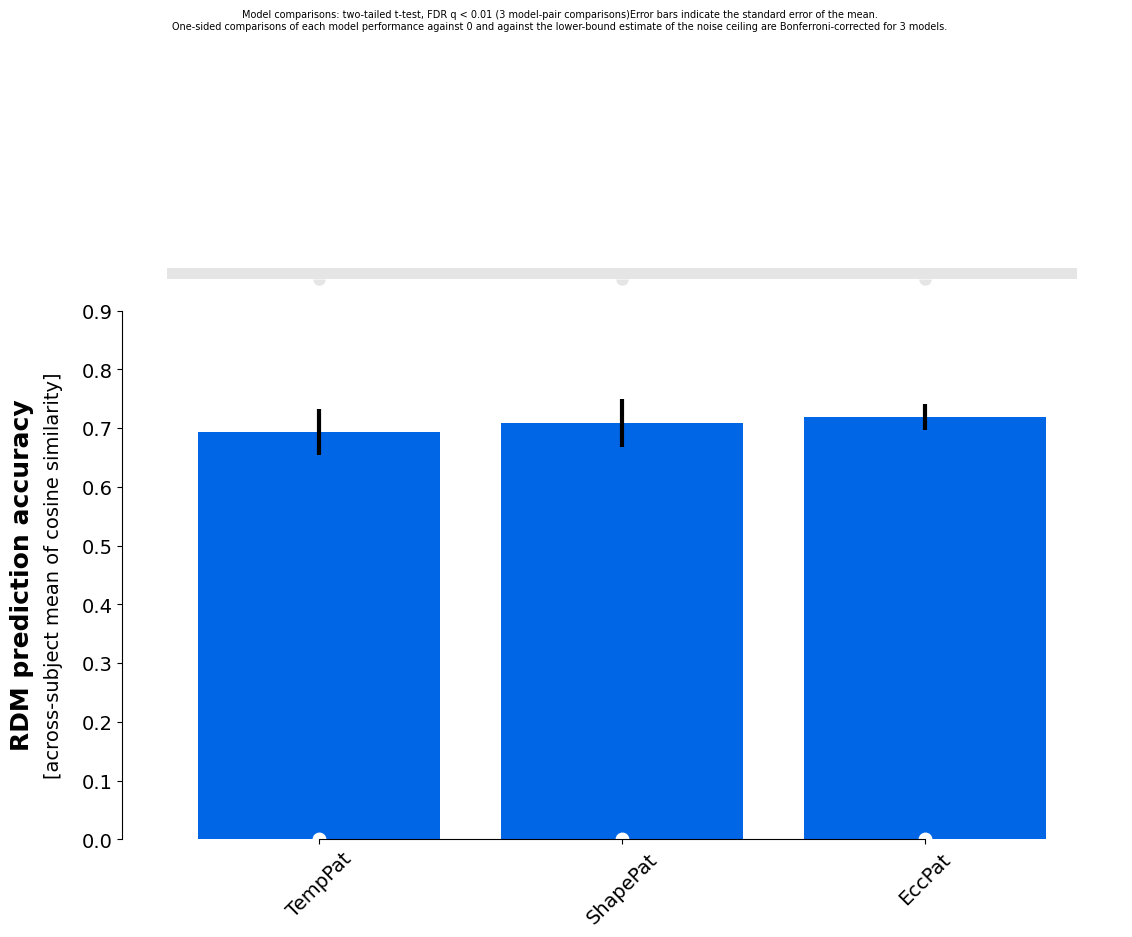

In [82]:
rsatoolbox.vis.plot_model_comparison(results_2c)

In [83]:
print(results_2c)

Results for running dual_bootstrap evaluation for cosine on 3 models:

Model    |   Eval ± SEM   | p (against 0) | p (against NC) |
------------------------------------------------------------
TempPat  |  0.694 ± 0.039 |      < 0.001  |       < 0.001  |
ShapePat |  0.709 ± 0.040 |      < 0.001  |       < 0.001  |
EccPat   |  0.719 ± 0.022 |      < 0.001  |       < 0.001  |

p-values are based on uncorrected t-tests


/gpfs/home/linjjiang/.local/lib/python3.11/site-packages/rsatoolbox/inference/result.py:222: RuntimeWarning: Mean of empty slice
  perf = np.nanmean(perf, axis=-1)
